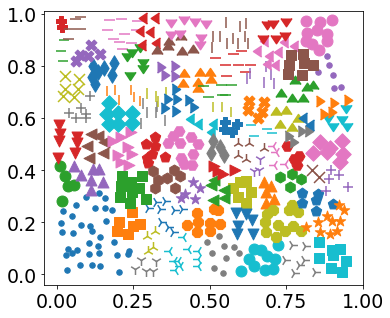

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.rcParams['font.size'] = 19  # You can set any numeric value here
file_folder = './fig/cluster/'
if not os.path.exists(file_folder):
    os.mkdir(file_folder)

# Load the CSV file into a DataFrame
df = pd.read_csv("./log/cluster/points_KDtree.csv")
markers = [
    ".", # point
    ",", # pixel
    "o", # circle
    "v", # triangle_down
    "^", # triangle_up
    "<", # triangle_left
    ">", # triangle_right
    "1", # tri_down
    "2", # tri_up
    "3", # tri_left
    "4", # tri_right
    "8", # octagon
    "s", # square
    "p", # pentagon
    "*", # star
    "h", # hexagon1
    "H", # hexagon2
    "+", # plus
    "x", # x
    "D", # diamond
    "d", # thin_diamond
    "|", # vline
    "_", # hline
    "P", # plus_filled
    "X", # x_filled
    0,    # tickleft
    1,    # tickright
    2,    # tickup
    3,    # tickdown
    4,    # caretleft
    5,    # caretright
    6,    # caretup
    7,    # caretdown
    8,    # caretleft (base)
    9,    # caretright (base)
    10,   # caretup (base)
    11,   # caretdown (base)
    # "None", # no marker
    # " ",   # nothing
    # "",    # nothing
    # "$...$" # Render the string using mathtext.
]
# Plotting
fig, ax = plt.subplots(figsize=(5.8, 4.8))
for cluster_id, group in df.groupby('cluster'):
    ax.scatter(group['x'], group['y'], 
               marker=markers[cluster_id % len(markers)], 
               s=120,
               label=f'Cluster {cluster_id}')

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
ax.set_xlim(-0.04, 1.0001)
ax.set_ylim(-0.04, 1.011)
plt.tight_layout()
plt.savefig(os.path.join(file_folder, 'clusters.pdf'))
# ax.set_title('Points by Cluster')
# ax.legend()

plt.show()


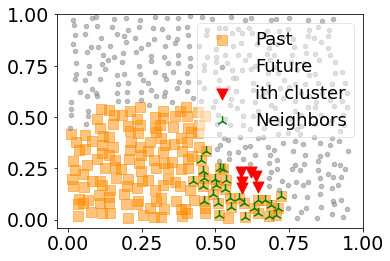

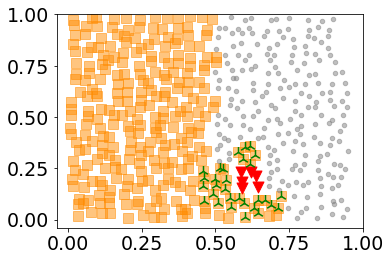

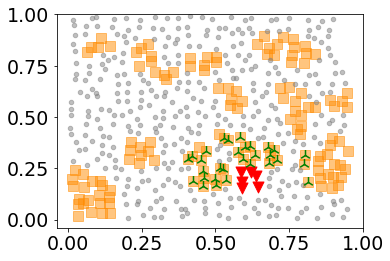

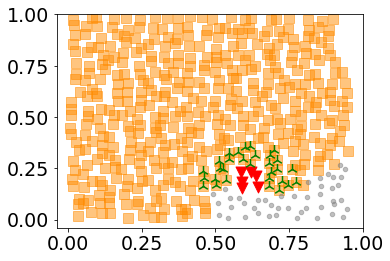

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# ith_cluster = 10 # 10 43
ordering = ['Morton', 'KDtree', 'Random', 'Hilbert']

def plot_ordering_cluster(flag="Morton", ith_cluster=10):
    # Load the CSV files
    points_df = pd.read_csv(f"./log/cluster/points_{flag}.csv")
    neighbors_df = pd.read_csv(f"./log/cluster/neighbors_{flag}.csv")

    # Assuming neighbors.csv lists points in neighbor clusters directly
    # Identify the unique clusters that are neighbors to the 50th cluster
    ith_neighbors_df = neighbors_df[neighbors_df['cluster'] == ith_cluster]
    ith_points_df = points_df[points_df['cluster'] == ith_cluster] 
    past_points = points_df[points_df['cluster'] < ith_cluster]
    future_points = points_df[points_df['cluster'] > ith_cluster]

    fig = plt.figure(figsize=(5.8, 4.0))
    # Plotting all points in grey as the background
    plt.scatter(past_points['x'], past_points['y'], 
                marker=markers[1], color='darkorange', s = 120,
                alpha=0.5, label='Past')
    plt.scatter(future_points['x'], future_points['y'], 
                marker=markers[0], color='grey', s = 80,
                alpha=0.5, label='Future')

    # Plotting the ith cluster in red
    plt.scatter(ith_points_df['x'], ith_points_df['y'], 
                color='red', marker=markers[3], s = 120,
                # label=f'{ith_cluster}th cluster'
                label=f'ith cluster'
                )

    # Plotting the ith neighbors in green
    plt.scatter(ith_neighbors_df['x'], ith_neighbors_df['y'], 
                color='green', marker=markers[8],s = 120,
                label=f'Neighbors')

    if (flag == "Morton" and ith_cluster==18):
        legend = plt.legend(fontsize=18)
    # Setting the alpha value of the legend's background
        legend.get_frame().set_alpha(0.5)
    plt.xlim(-0.04, 1.001)
    plt.ylim(-0.04, 1.001)
    plt.tight_layout()
    plt.savefig(os.path.join(file_folder, f'NN_{flag}_{ith_cluster}_sameblock.pdf'))

    plt.show()

cluster_num = [18, 40, 19, 71]
for ord, ith in zip(ordering, cluster_num):
    plot_ordering_cluster(ord, ith)